In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
data = pd.read_csv(r'Airplane_Crashes_and_Fatalities_Since_1908_to_2023.csv', encoding='latin1')
df=data.copy()
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
df.shape

(4998, 17)

In [ ]:
df.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4980.000000,4769.000000,4772.000000,4990.000000,4756.000000,4757.000000,4956.000000
mean,31.195984,27.009017,4.479254,22.373547,19.053827,3.578516,1.719128
std,45.534788,44.111609,3.483859,35.061741,34.146127,3.167922,55.540273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [ ]:
column_names = df.columns
for i in column_names:
    print(i)

Date
Time
Location
Operator
Flight #
Route
AC Type
Registration
cn/ln
Aboard
Aboard Passangers
Aboard Crew
Fatalities
Fatalities Passangers
Fatalities Crew
Ground
Summary


In [ ]:
print(df.isnull().sum())

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


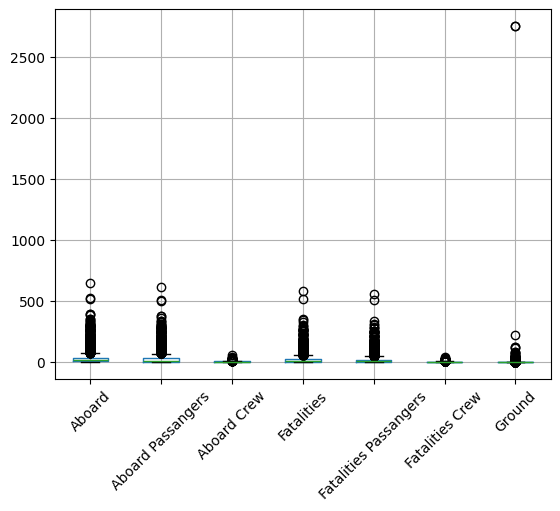

In [ ]:
df.boxplot(column=['Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
max_value = df['Ground'].max()
print(max_value)

2750.0


In [ ]:
df.drop(df[df['Ground'] == max_value].index, inplace=True)

In [ ]:
# List of columns to drop
columns_to_remove = ['Flight #', 'Registration', 'cn/ln']

# Drop the columns
df = df.drop(columns=columns_to_remove)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [ ]:
print(df.isnull().sum())

Date                        0
Time                     1515
Location                    4
Operator                   10
Route                     777
AC Type                    15
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


In [ ]:
df.dropna(subset=['Operator'], inplace=True)
df.dropna(subset=['Location'], inplace=True)
df.dropna(subset=['AC Type'], inplace=True)
df.dropna(subset=['Aboard'], inplace=True)
df.dropna(subset=['Fatalities'], inplace=True)
df.dropna(subset=['Ground'], inplace=True)
df.dropna(subset=['Summary'], inplace=True)


In [ ]:
def fill_with_mode_or_default(group):
    if not group.mode().empty:
        return group.fillna(group.mode()[0])
    else:
        return group.fillna('00:00')


df['Time'] = df.groupby(['Date', 'Operator'])['Time'].transform(fill_with_mode_or_default)


In [ ]:
df['Aboard Passangers'] = df['Aboard Passangers'].fillna(df['Aboard'] - df['Aboard Crew'])


In [ ]:
df['Aboard Crew'] = df['Aboard Crew'].fillna(df['Aboard'] - df['Aboard Passangers'])

In [ ]:
df['Fatalities Passangers'] = df['Fatalities Passangers'].fillna(df['Fatalities'] - df['Fatalities Crew'])

In [ ]:
print(df.isnull().sum())

Date                       0
Time                       0
Location                   0
Operator                   0
Route                    702
AC Type                    0
Aboard                     0
Aboard Passangers        170
Aboard Crew              170
Fatalities                 0
Fatalities Passangers    184
Fatalities Crew          187
Ground                     0
Summary                    0
dtype: int64


In [ ]:
df.Operator = df.Operator.str.upper()

In [ ]:
df.dropna(inplace=True)

In [ ]:
print(df.isnull().sum())

Date                     0
Time                     0
Location                 0
Operator                 0
Route                    0
AC Type                  0
Aboard                   0
Aboard Passangers        0
Aboard Crew              0
Fatalities               0
Fatalities Passangers    0
Fatalities Crew          0
Ground                   0
Summary                  0
dtype: int64


In [ ]:
print(df.dtypes)

Date                     datetime64[ns]
Time                             object
Location                         object
Operator                         object
Route                            object
AC Type                          object
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                          object
dtype: object


In [ ]:
print(df.describe())
print(df.describe(include='object'))

                                Date       Aboard  Aboard Passangers  \
count                           4107  4107.000000        4107.000000   
mean   1973-07-26 20:30:19.722425104    34.247869          29.616508   
min              1908-09-17 00:00:00     0.000000           0.000000   
25%              1954-04-10 12:00:00     7.000000           4.000000   
50%              1972-08-14 00:00:00    18.000000          14.000000   
75%              1993-12-20 12:00:00    39.000000          34.000000   
max              2023-11-01 00:00:00   644.000000         614.000000   
std                              NaN    48.593244          46.473838   

       Aboard Crew   Fatalities  Fatalities Passangers  Fatalities Crew  \
count  4107.000000  4107.000000            4107.000000      4107.000000   
mean      4.640614    24.522766              20.908206         3.697346   
min       0.000000     0.000000               0.000000         0.000000   
25%       2.000000     4.000000               2.000

Feature Engineering

In [ ]:
df['Fatality Rate'] = (df['Fatalities'] / df['Aboard']) * 100

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

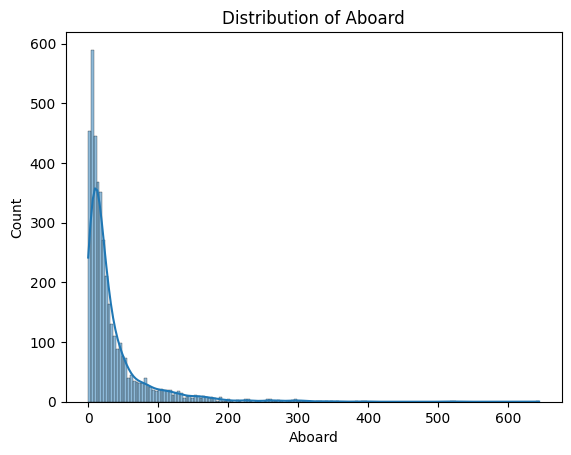

In [ ]:
# Plot histogram for 'Aboard'
sns.histplot(df['Aboard'], kde=True)
plt.title('Distribution of Aboard')
plt.show()


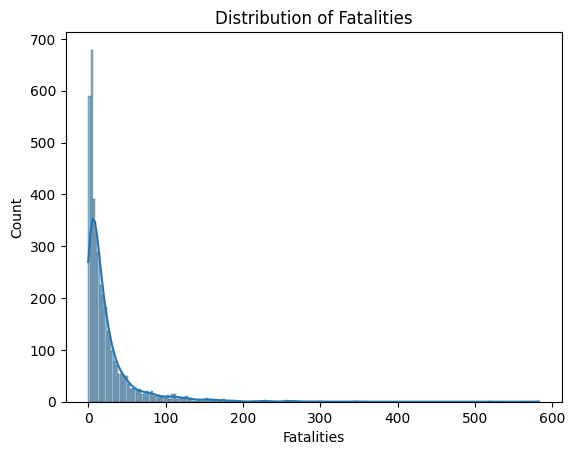

In [ ]:

# Plot histogram for 'Fatalities'
sns.histplot(df['Fatalities'], kde=True)
plt.title('Distribution of Fatalities')
plt.show()

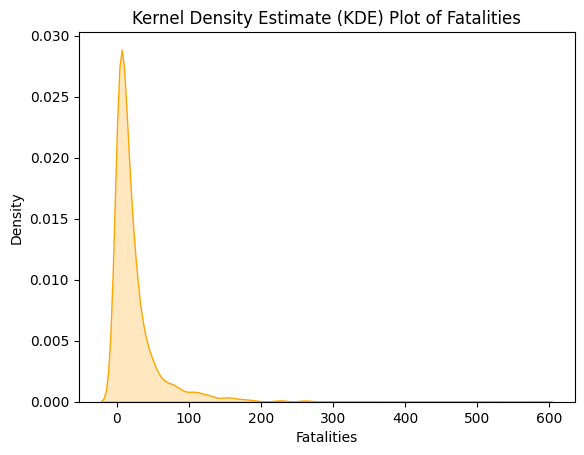

In [ ]:

#plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fatalities'], fill=True, color='orange')
plt.title('Kernel Density Estimate (KDE) Plot of Fatalities')
plt.xlabel('Fatalities')
plt.show()


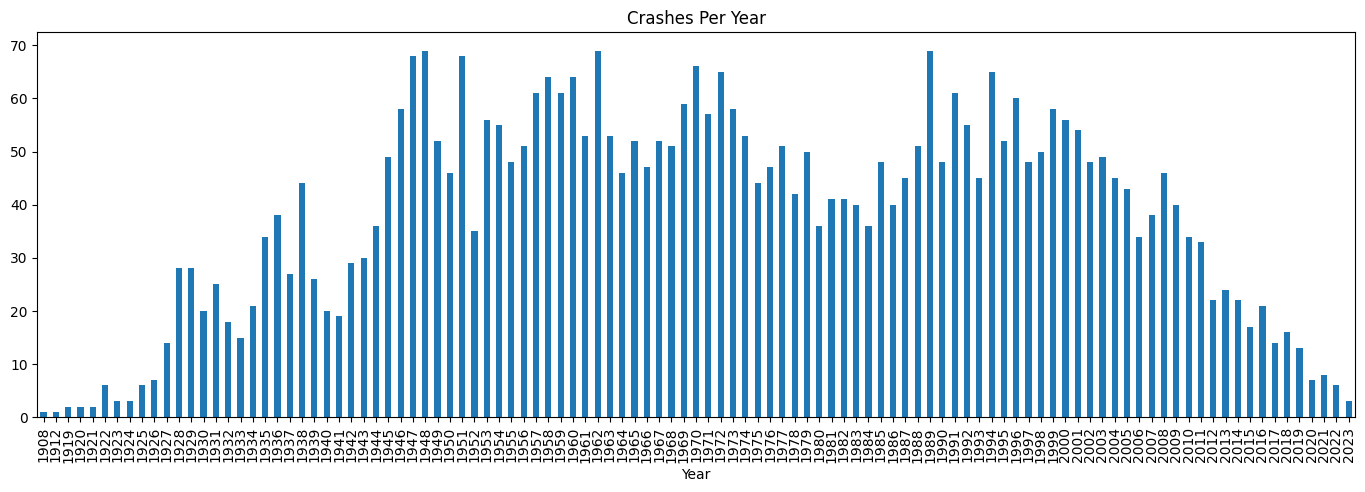

In [ ]:
plt.figure(figsize=(17, 5))
crashes_per_year = df.groupby('Year').size()
crashes_per_year.plot(kind='bar', title="Crashes Per Year")
plt.show()

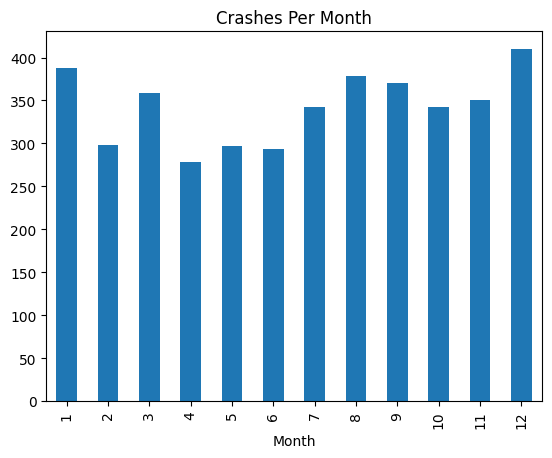

In [ ]:
crashes_per_month = df.groupby('Month').size()
crashes_per_month.plot(kind='bar', title="Crashes Per Month")
plt.show()

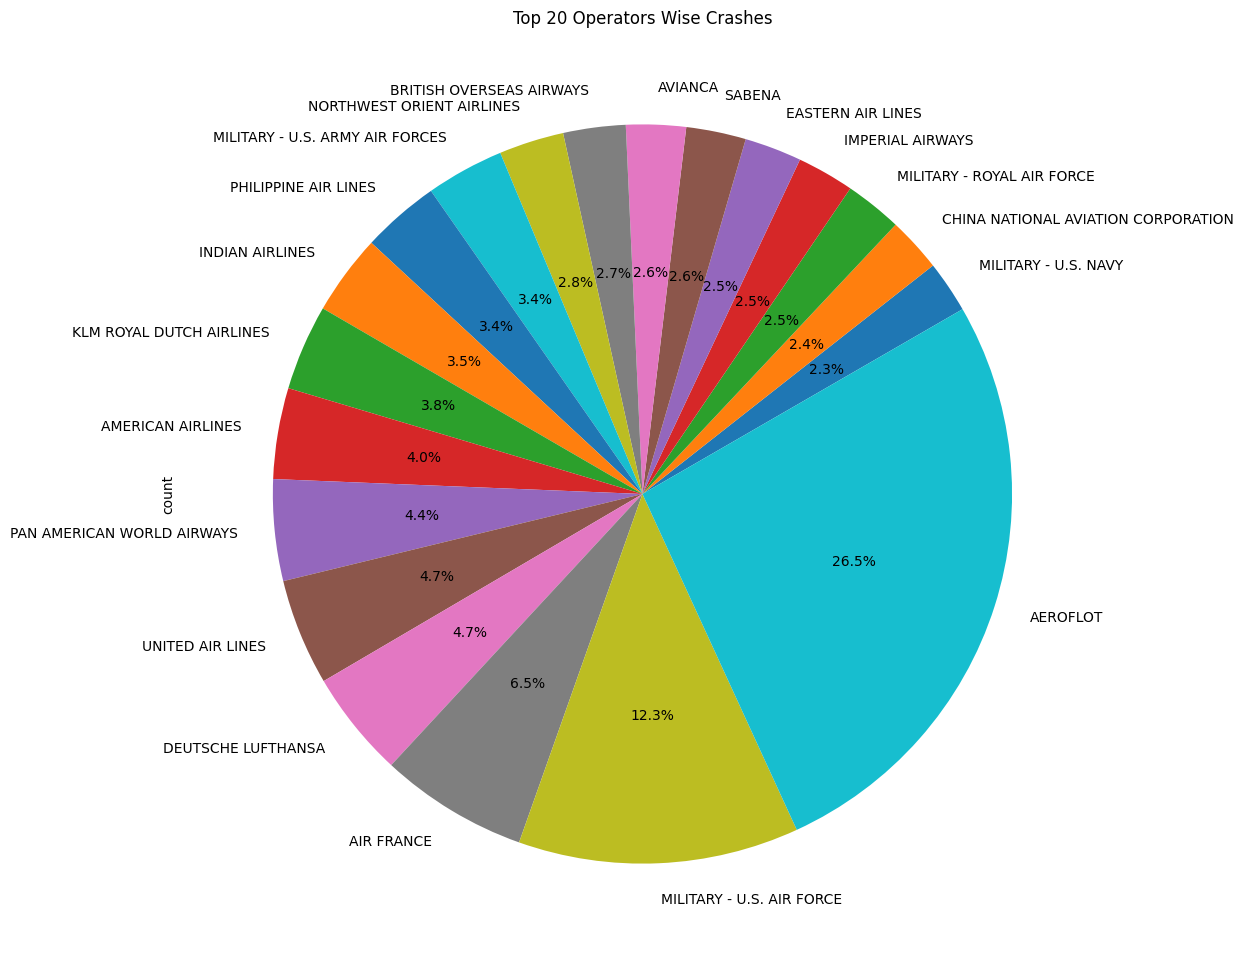

In [ ]:
# Get the top 20 operators with the most crashes
operators = df['Operator'].value_counts().sort_values().tail(20)

# Create a pie chart for the top 20 operators
operators.plot.pie(subplots=True, autopct='%1.1f%%', shadow=False, startangle=30, fontsize=10, figsize=(12, 12))

# Add a title
plt.title("Top 20 Operators Wise Crashes")

# Show the plot
plt.show()

In [ ]:
print(df.dtypes)

Date                     datetime64[ns]
Time                             object
Location                         object
Operator                         object
Route                            object
AC Type                          object
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                          object
Fatality Rate                   float64
Year                              int32
Month                             int32
dtype: object


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


numeric_columns = df[['Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities',
                      'Fatalities Passangers', 'Fatalities Crew', 'Ground']]


X = add_constant(numeric_columns)


X = X.dropna()


vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


                 Feature          VIF
0                  const     2.898435
1                 Aboard  8006.494381
2      Aboard Passangers  7334.346199
3            Aboard Crew    44.631500
4             Fatalities   132.748131
5  Fatalities Passangers   116.888516
6        Fatalities Crew     6.245320
7                 Ground     1.002049


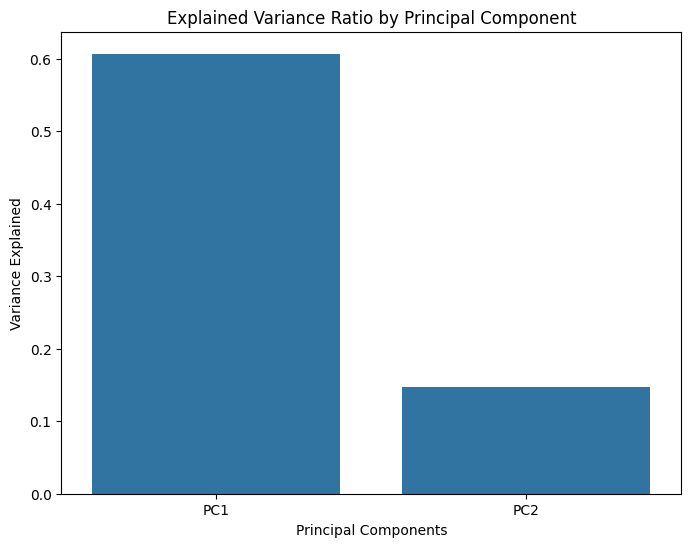

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = df[['Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities',
                      'Fatalities Passangers', 'Fatalities Crew', 'Ground']]


numeric_columns = numeric_columns.dropna()


scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_columns)


pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_scaled)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(8,6))
sns.barplot(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
            y=pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()



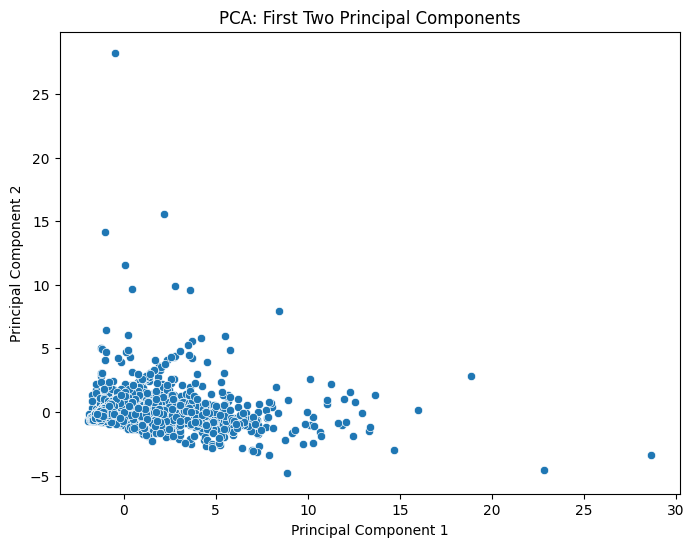

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


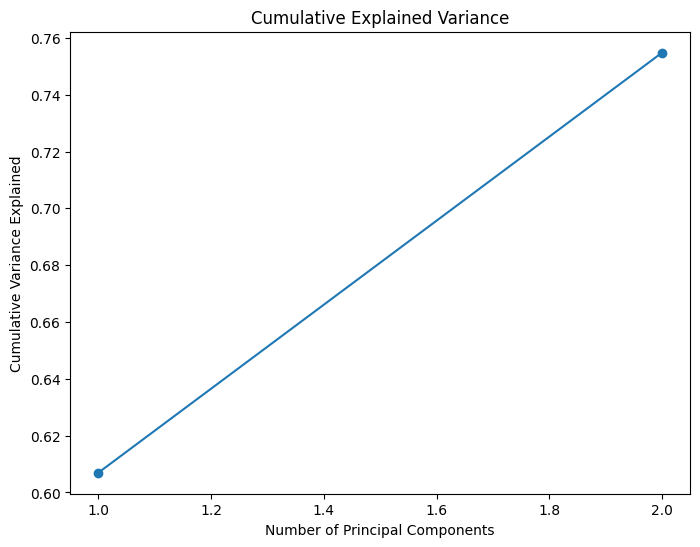

In [ ]:

cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

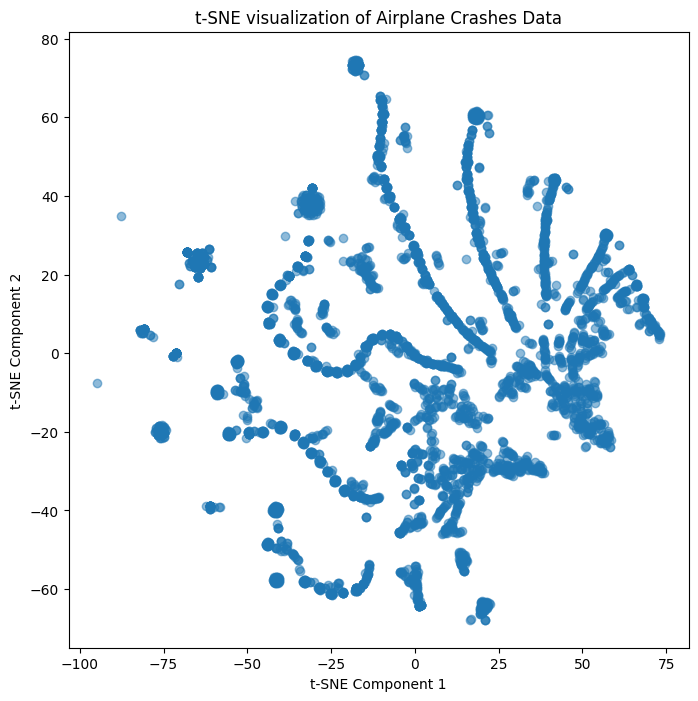

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


numeric_columns = df[['Aboard', 'Aboard Passangers', 'Aboard Crew', 'Fatalities',
                      'Fatalities Passangers', 'Fatalities Crew', 'Ground']]


numeric_columns = numeric_columns.dropna()


scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_columns)


tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(numeric_scaled)


tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])


plt.figure(figsize=(8,8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.5)
plt.title('t-SNE visualization of Airplane Crashes Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


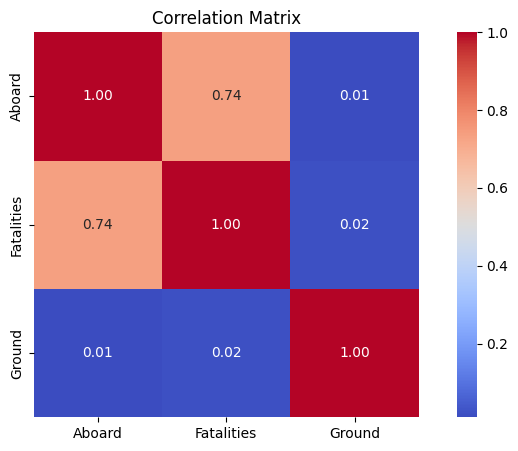

In [ ]:

correlation_matrix = df[['Aboard', 'Fatalities', 'Ground']].corr()


plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)


plt.title('Correlation Matrix')


plt.show()

# Feature Engineering

In [ ]:
df['Fatality Rate'] = df['Fatalities'] / df['Aboard']
df['Passenger Proportion'] = df['Aboard Passangers'] / df['Aboard']
df['Crew Proportion'] = df['Aboard Crew'] / df['Aboard']

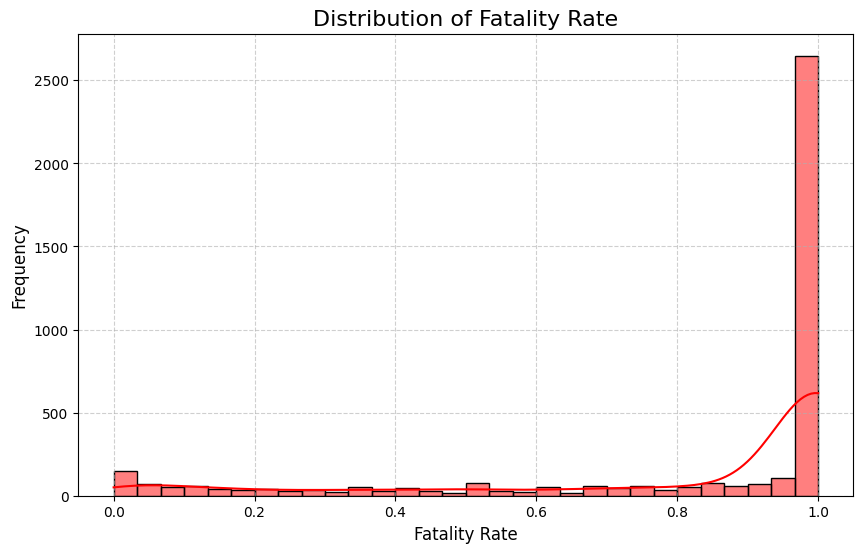

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Fatality Rate'], bins=30, kde=True, color='red')
plt.title('Distribution of Fatality Rate', fontsize=16)
plt.xlabel('Fatality Rate', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



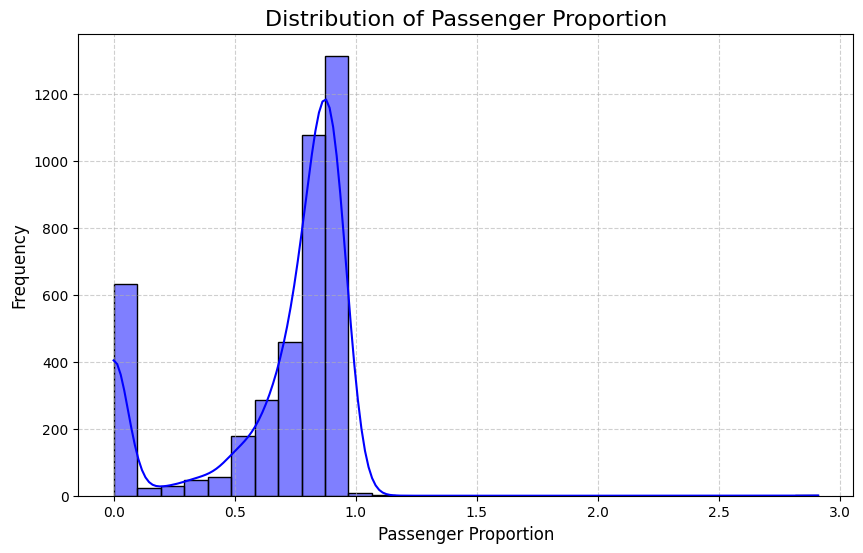

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Passenger Proportion'], bins=30, kde=True, color='blue')
plt.title('Distribution of Passenger Proportion', fontsize=16)
plt.xlabel('Passenger Proportion', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



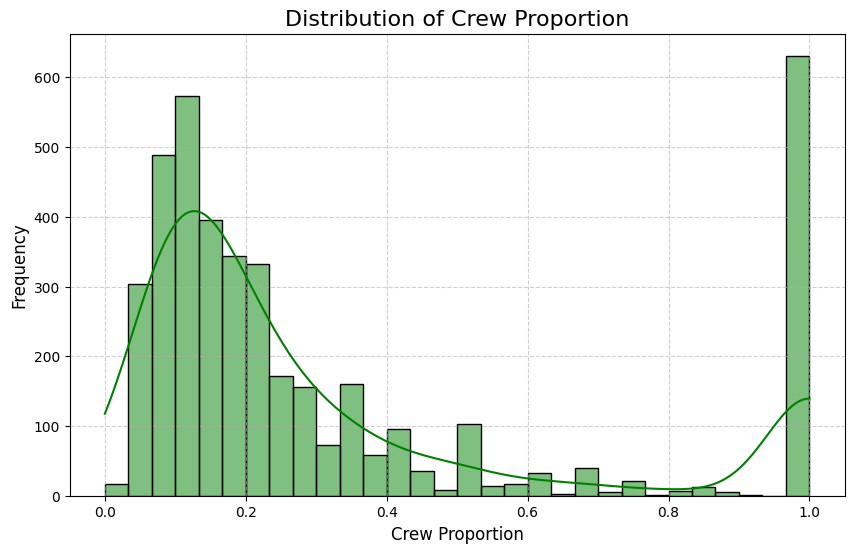

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Crew Proportion'], bins=30, kde=True, color='green')
plt.title('Distribution of Crew Proportion', fontsize=16)
plt.xlabel('Crew Proportion', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()